In [15]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [16]:
data_dir = "D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset"

In [17]:
data = []

In [18]:
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    if os.path.isdir(folder_path):  
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            data.append({"image_path": image_path, "label": folder_name})


In [19]:
df = pd.DataFrame(data)
print("Dataset Overview:")
print(df.head())
print(f"Total Images: {len(df)}")
print(f"Total Classes: {df['label'].nunique()}")

Dataset Overview:
                                          image_path     label
0  D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset\...  Aloevera
1  D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset\...  Aloevera
2  D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset\...  Aloevera
3  D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset\...  Aloevera
4  D:\MED_LEAF_ID\dataset\Medicinal Leaf dataset\...  Aloevera
Total Images: 6900
Total Classes: 80


In [20]:
print("\nClass Distribution:")
print(df['label'].value_counts())


Class Distribution:
label
Tulsi             177
Tamarind          176
Curry             168
Palak(Spinach)    149
Doddpathre        142
                 ... 
Sapota             44
Raddish            40
Turmeric           39
Lemongrass          8
Pepper              8
Name: count, Length: 80, dtype: int64


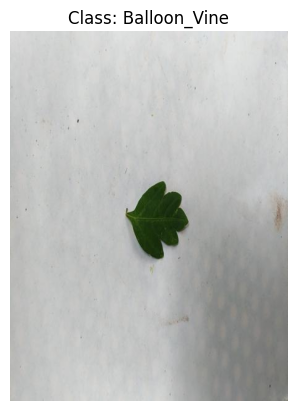

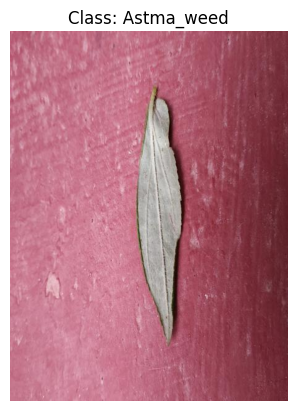

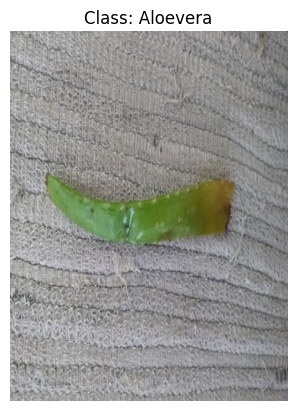

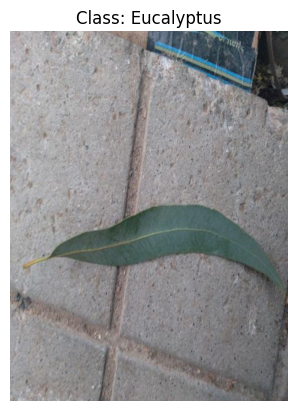

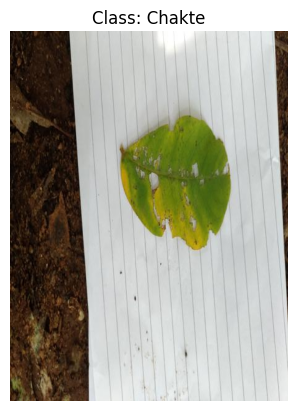

In [21]:
import random

# Display random images
for i in range(5):
    random_row = df.sample(1).iloc[0]
    img = Image.open(random_row['image_path'])
    plt.imshow(img)
    plt.title(f"Class: {random_row['label']}")
    plt.axis("off")
    plt.show()

In [22]:

dimensions = []
for img_path in df['image_path']:
    with Image.open(img_path) as img:
        dimensions.append(img.size)
dim_df = pd.DataFrame(dimensions, columns=["Width", "Height"])
print("Image Properties Summary:")
print(dim_df.describe())


Image Properties Summary:
             Width       Height
count  6900.000000  6900.000000
mean   1723.061884  1423.510870
std    1637.725440  1178.279223
min     450.000000   600.000000
25%     450.000000   600.000000
50%     450.000000   600.000000
75%    4000.000000  2250.000000
max    4656.000000  4656.000000


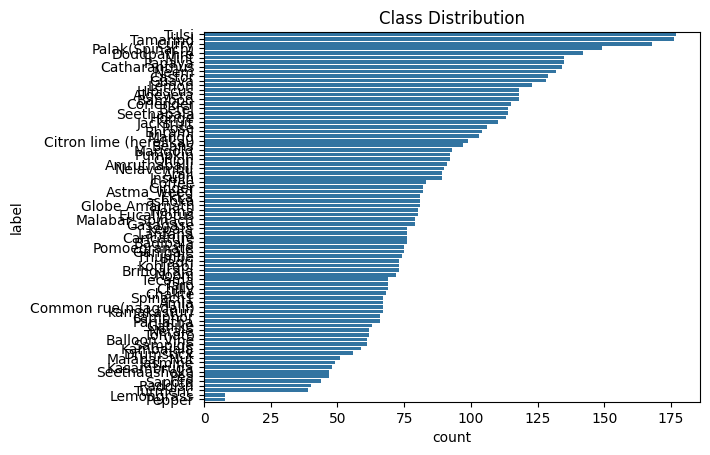

Corrupt images: 0


In [23]:

import seaborn as sns

sns.countplot(data=df, y="label", order=df['label'].value_counts().index)
plt.title("Class Distribution")
plt.show()

corrupt_count = 0
for img_path in df['image_path']:
    try:
        with Image.open(img_path) as img:
            img.verify()  
    except:
        corrupt_count += 1
print(f"Corrupt images: {corrupt_count}")


In [24]:
class_distribution = df['label'].value_counts()

class_distribution_str = class_distribution.to_string()

print(class_distribution_str)



label
Tulsi                      177
Tamarind                   176
Curry                      168
Palak(Spinach)             149
Doddpathre                 142
Mint                       135
Papaya                     135
Catharanthus               134
Neem                       132
Castor                     129
Guava                      128
Lemon                      123
Hibiscus                   118
Aloevera                   118
Bamboo                     118
Coriender                  115
Betel                      114
Seethapala                 114
Honge                      113
Jackfruit                  110
Rose                       106
Bhrami                     104
Mango                      103
Citron lime (herelikai)     99
Beans                       97
Marigold                    93
Pumpkin                     92
Onion                       92
Amruthaballi                91
Nelavembu                   90
Arali                       89
Insulin                     89
Co